<a href="https://colab.research.google.com/github/aagolovina/Uralic-languages-research-seminar-/blob/main/Hungarian_combinations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
with open('Wordlist(Hungarian).txt', 'r', encoding = 'utf-8') as f: # файл, содержащий 1000 самых употребительных венгерских слов
    file = f.read().split()
    with open('Wordlist_filtered(Hungarian).txt', 'w', encoding = 'utf-8') as w:
        for word in file: # удаление слов, состоящих из 1 символа (наиболее репрезентативен отфильтрованный файл)
            if len(word) > 1:
                w.write(word)
                w.write('\n')

In [18]:
import re

with open('Stat_of_combinations.txt', "w", encoding="utf-8") as stat:
    stat.write('Consonants,Vowels,Num')
    stat.write('\n')
    with open('Wordlist_filtered(Hungarian).txt', "r", encoding="utf-8") as f:
          words = f.read().split()

    res = []
    for word in words:
        cons_vow = re.findall(r'[glnt]y?[eéiíöőüű]', word) # регулярка для поиска палатализованных и веляризованных согласных в сочетании с гласными переднего ряда
        res.append(cons_vow) # в список добавляются не только строки, но и списки (если в слове две и более интересующих сочетаний)

    pairs = []
    for lists in res:
        for comb in lists:
            pairs.append(comb) # "распаковка" списков и помещение всех сочетаний в один список

# далее код похож на образец с сайта, т.к. его писала на основе своего первого кода, а при написании первого пыталась адаптировать образец с сайта под венгерский язык
# старалась максимально переделать код из образца, но основные черты остались те же

    syllables, consonants = {}, {} # первый словарь - слоги и их количество, второй словарь - согласные и их количество
    for pair in pairs:
        syl = (pair[:-1], pair[-1]) # "слог" в виде кортежа: сочетание интересующего согласного и интересующего гласного
        con  = pair[:-1] # палатализованный или веляризованный согласный
        
        syllables[syl] = syllables.setdefault(syl, 0) + 1
        consonants[con] = consonants.setdefault(con, 0) + 1

    for key, value in syllables.items():
        con = key[0] # присвоение для обращения к тому же согласному
        syllables[key] = round(value / consonants[con] * 100, 2) # перезапись по ключам: отношение количества определенных сочетаний к количеству всех сочетаний с тем же согласным

    for key, value in syllables.items():
        consonant, vowel = list(key)[0], list(key)[1]

        print(f'{consonant},{vowel},{value}')

        stat.write(f'{consonant},{vowel},{value}')
        stat.write('\n')

l,e,60.36
ly,e,85.71
n,é,14.52
n,ö,9.68
n,i,20.97
n,e,41.94
g,ő,6.25
t,é,26.97
t,e,43.82
l,ő,12.61
t,ü,1.12
g,í,3.12
l,ö,3.6
l,é,11.71
g,i,21.88
l,ü,1.8
t,ö,16.85
n,ő,9.68
gy,e,57.89
g,e,37.5
gy,i,5.26
ny,i,14.29
gy,ü,10.53
ny,ű,14.29
l,i,8.11
t,ű,2.25
g,é,25.0
ny,e,28.57
n,í,1.61
g,ö,6.25
t,í,2.25
n,ű,1.61
ny,í,14.29
t,i,4.49
ly,i,14.29
gy,ű,15.79
gy,ö,5.26
t,ő,2.25
l,í,1.8
ny,é,28.57
gy,ő,5.26


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

table = pd.read_csv('Stat_of_combinations.txt')
table_syl_stat = pd.pivot_table(table, index = ["Consonants"], columns = ["Vowels"], values="Num", fill_value=0) # создание сводной таблицы

table_syl_stat

Vowels,e,i,é,í,ö,ü,ő,ű
Consonants,,,,,,,,
g,37.50,21.88,25.00,3.12,6.25,0.00,6.25,0.00
gy,57.89,5.26,0.00,0.00,5.26,10.53,5.26,15.79
l,60.36,8.11,11.71,1.80,3.60,1.80,12.61,0.00
ly,85.71,14.29,0.00,0.00,0.00,0.00,0.00,0.00
n,41.94,20.97,14.52,1.61,9.68,0.00,9.68,1.61
ny,28.57,14.29,28.57,14.29,0.00,0.00,0.00,14.29
t,43.82,4.49,26.97,2.25,16.85,1.12,2.25,2.25


In [ ]:
# Выводы:
# 1. Лабиализованные гласные в целом проявляют большую селективность, чем нелабиализованные (т.е. более избирательны в сочетании с согласными)
# 2. Гласные чаще встречаются в сочетании с недентальными согласными
# 3. Абсолютные рекордсмены по сочетаемости -- гласные среднего подъема
# 4. Велярный взрывной и латеральный аппроксимант чаще встречаются в сочетаниях, чем дентальные звуки
# 5. Палатализованные незубные значительно чаще сочетаются с гласным переднего ряда, чем их непалаталиованные корреляты

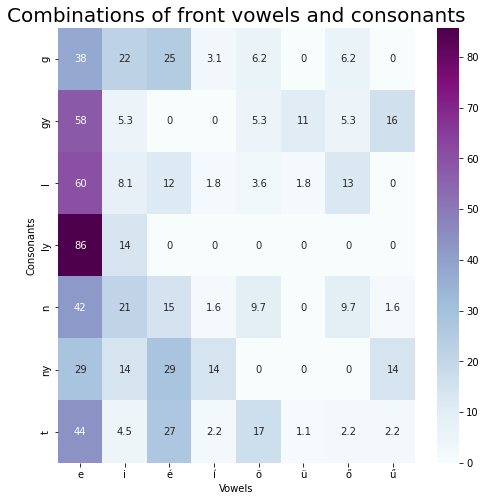

In [21]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(table_syl_stat, cmap = "BuPu", annot = True, ax = ax)
bottom, top = ax.get_ylim()

plt.title('Combinations of front vowels and consonants', fontsize = 20)
ax.set_xlabel('Vowels')
ax.set_ylabel('Consonants')

plt.show()